In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## __Task 1. Merging the 12-month CSV sales files into one single CSV file__

In [2]:
folder_path = "./Sales Data"
files = [file for file in os.listdir(folder_path)]

all_months_data = pd.concat(
    [pd.read_csv(os.path.join(folder_path, file)) for file in files],
    ignore_index=True)

In [3]:
#Save to CSV the new merged file
all_months_data.to_csv("all_data.csv", index = False)

### Read the new merged file (To avoid run the python script everytime I want all the data files)

In [4]:
all_data = pd.read_csv("all_data.csv")

### __Task 1.1 Cleaning up the Data!__

### Drop NaN values

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Looks like in the Order Date column, we have some noise data

In [7]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Convert the variables to the correct type

In [8]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

In [10]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

## __Task 2. Adding additional columns to do further analysis__

### __Task 2.1 Adding the Month column__

In [11]:
# Extract the month from the "Order Date" column and create a new column called "Month"
all_data['Month'] = all_data['Order Date'].dt.month
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


### __Task 2.2 Adding the Sales column (Quantity * Price each)__

In [12]:
all_data["Sales"] = all_data["Quantity Ordered"]*all_data["Price Each"]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


### __Task 2.3 Extracting the City from the Purchase Address__

In [28]:
# Extract the city name from the "Purchase Address" column
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1].str.strip()
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [ ]:
### __Task 2.3 Extracting the State from the Purchase Address__

In [35]:
# Extract the state value from the "Purchase Address" column
all_data['State'] = all_data['Purchase Address'].str.split(',').str[2].str.split().str[0]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,CA
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,CA
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,CA
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,CA


## __Question 1. What was the best month for sales?? How much was earned that month??__

In [18]:
month_sales = all_data.groupby("Month").sum()["Sales"]
month_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

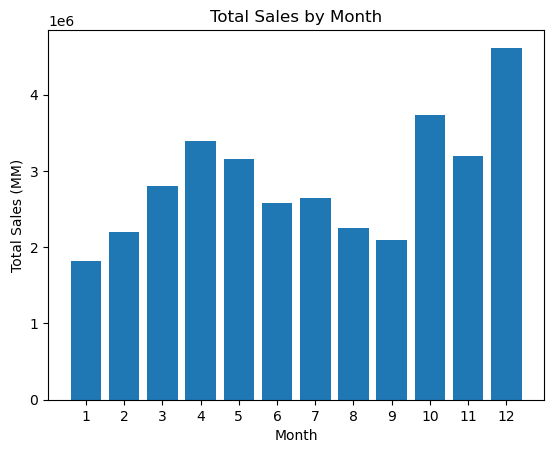

In [45]:
# Create a bar plot
plt.bar(month_sales.index, month_sales.values)
plt.xticks(month_sales.index)
plt.xlabel('Month')
plt.ylabel('Total Sales (MM)')
plt.title('Total Sales by Month')

# Display the plot
plt.show()

## Interpretation
We can see that December had the highest sales in the entire year. 
Why is that??
One option would be the Big Holiday in December (Christmas), that would explain why January had the lowest sales registration (everyone spent money on December because of the Holidays, so people in January would be with lack of money.

## __Question 2. What city had the highest number of sales??__

In [36]:
highest_city_sales = all_data.groupby("City").sum()["Sales"]
highest_city_sales

City
Atlanta          2795498.58
Austin           1819581.75
Boston           3661642.01
Dallas           2767975.40
Los Angeles      5452570.80
New York City    4664317.43
Portland         2320490.61
San Francisco    8262203.91
Seattle          2747755.48
Name: Sales, dtype: float64

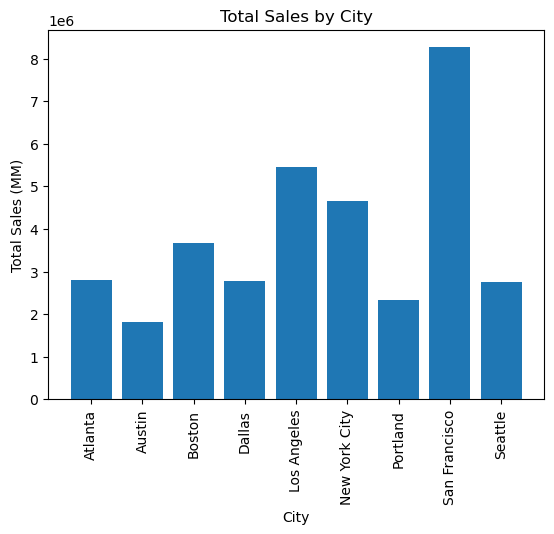

In [44]:
# Create a bar plot
plt.bar(highest_city_sales.index, highest_city_sales.values)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('City')
plt.ylabel('Total Sales (MM)')
plt.title('Total Sales by City')

# Display the plot
plt.show()

## __Question 3. What time should we display advertisements to maximize likelihood of customer's buying product??__

In [47]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [48]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9


In [54]:
hours_sales = all_data.groupby("Hour").count()["Sales"]
hours_sales

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64

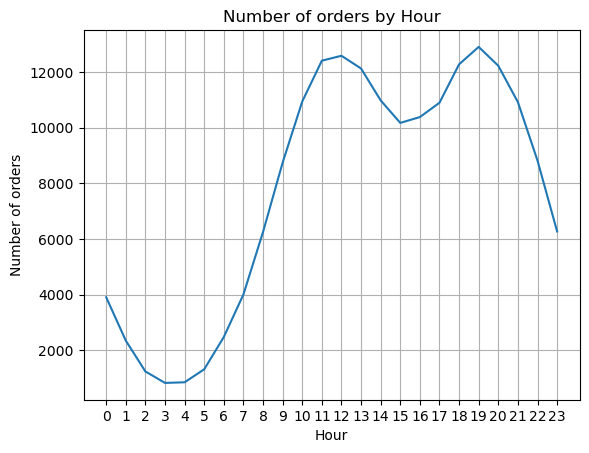

In [57]:
# Create a bar plot
plt.plot(hours_sales.index, hours_sales.values)
plt.xticks(hours_sales.index)  # Rotate x-axis labels for better readability
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.title('Number of orders by Hour')
plt.grid()
# Display the plot
plt.show()

## Interpretation
A ccording to the data from 2019, in order to maximize likelihood of customer's buying product, the best hours for display advertisements would be around 11 am (11) or 7 pm (19)

## __Question 4. What products are most often sold together?__

### In order to see the combinations of products, we need to focus on the Order ID column

In [85]:
# Group the dataset by Order ID and aggregate the Product column as a list
grouped_data = all_data.groupby('Order ID')['Product'].apply(list)
grouped_data

Order ID
141234                        [iPhone]
141235      [Lightning Charging Cable]
141236              [Wired Headphones]
141237              [27in FHD Monitor]
141238              [Wired Headphones]
                      ...             
319666      [Lightning Charging Cable]
319667         [AA Batteries (4-pack)]
319668               [Vareebadd Phone]
319669              [Wired Headphones]
319670    [Bose SoundSport Headphones]
Name: Product, Length: 178437, dtype: object

In [86]:
# Create an empty list to store the combinations of products
combinations = []

# Iterate over the grouped data
for products in grouped_data:
    if len(products) > 1:  # Consider only orders with more than one product
        # Generate all combinations of two products
        product_combinations = pd.DataFrame(list(itertools.combinations(products, 2)),
                                            columns=['Product 1', 'Product 2'])

        # Append the product combinations to the list
        combinations.append(product_combinations)

In [87]:
# Concatenate the list of combinations into a single DataFrame
combinations = pd.concat(combinations)

# Calculate the count of each product combination
combinations = combinations.value_counts().reset_index()

In [88]:
combinations

,Product 1,Product 2,0
0,iPhone,Lightning Charging Cable,1005
1,Google Phone,USB-C Charging Cable,987
2,iPhone,Wired Headphones,447
3,Google Phone,Wired Headphones,414
4,Vareebadd Phone,USB-C Charging Cable,361
...,...,...,...
308,LG Dryer,Flatscreen TV,1
309,LG Dryer,AAA Batteries (4-pack),1
310,LG Dryer,27in FHD Monitor,1
311,LG Dryer,27in 4K Gaming Monitor,1


In [94]:
# Calculate the count of each product combination
combinations = combinations.rename(columns={0: 'Count'})
combinations = combinations.sort_values('Count', ascending=False)

In [95]:
# Display the most frequently sold product combinations
combinations.head(10)

,Product 1,Product 2,Count
0,iPhone,Lightning Charging Cable,1005
1,Google Phone,USB-C Charging Cable,987
2,iPhone,Wired Headphones,447
3,Google Phone,Wired Headphones,414
4,Vareebadd Phone,USB-C Charging Cable,361
5,iPhone,Apple Airpods Headphones,360
6,Google Phone,Bose SoundSport Headphones,220
7,USB-C Charging Cable,Wired Headphones,160
8,Vareebadd Phone,Wired Headphones,143
9,Lightning Charging Cable,Wired Headphones,92


## __Question 5. What products sold the most? Compare the quantities sold with the price__

In [97]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9


In [103]:
best_sold_products = all_data.groupby("Product").sum()["Quantity Ordered"]
best_sold_products

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [125]:
prices = all_data.groupby("Product").mean()["Price Each"]
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

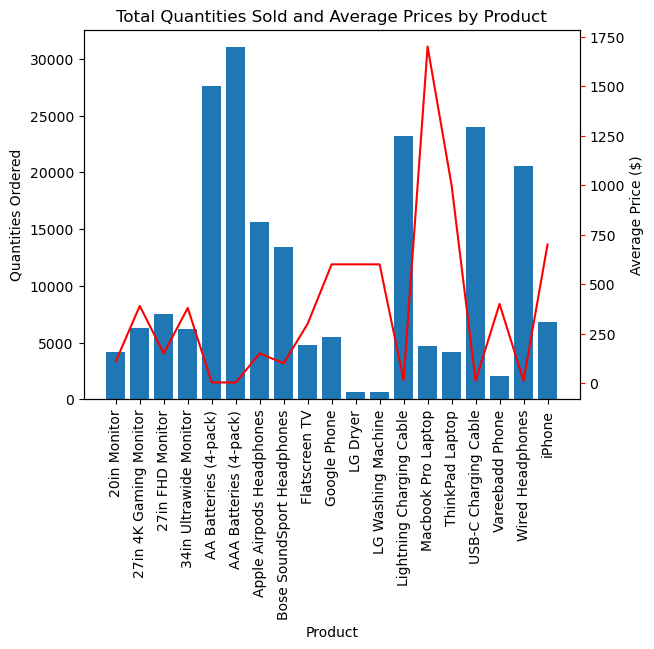

In [132]:
import matplotlib.pyplot as plt

# Create the bar plot for quantities ordered
fig, ax = plt.subplots()
ax.bar(best_sold_products.index, best_sold_products.values)
ax.set_xlabel('Product')
ax.set_ylabel('Quantities Ordered')
ax.set_title('Total Quantities Sold and Average Prices by Product')
ax.tick_params(axis='x', rotation=90)

# Create the line graph for average prices on the secondary y-axis
ax2 = ax.twinx()
ax2.plot(prices.index, prices.values, color='red')
ax2.set_ylabel('Average Price ($)')
ax2.tick_params(axis='y', color='red')

# Display the plot
plt.show()

## Interpretation
Whenever the quantity order is high, the average price of the product is low.
Whenever the quantity order is low, the average price of the product is high.
As the price of a product increase, the demand decrease, because not many people are willing to pay the price of that products.